In [72]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('tensorflow version', tf.__version__)
bank_data = pd.read_csv('data/1_american_dataset.csv')
# data_features = pd.read_csv('data/bankrupt_features.csv')
# data_status = pd.read_csv('data/status_bankrupt.csv')

tensorflow version 2.11.0


In [73]:
from sklearn.model_selection import train_test_split

numerical_only = bank_data.select_dtypes(include=['float64','int64'])
X = numerical_only.drop(['cik', 'fyear', 'status'], axis=1)
y = numerical_only["status"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
def simple_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(),
            metrics=['accuracy'])
    return model

In [58]:
model = simple_model()
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1968/1968 [==============================] - 4s 2ms/step - loss: 10.3058 - accuracy: 0.8963
Epoch 2/10
1968/1968 [==============================] - 3s 1ms/step - loss: 6.8009 - accuracy: 0.9041
Epoch 3/10
1968/1968 [==============================] - 3s 1ms/step - loss: 5.2358 - accuracy: 0.9071
Epoch 4/10
1968/1968 [==============================] - 3s 1ms/step - loss: 5.8288 - accuracy: 0.9111
Epoch 5/10
1968/1968 [==============================] - 3s 2ms/step - loss: 3.1399 - accuracy: 0.9101
Epoch 6/10
1968/1968 [==============================] - 3s 2ms/step - loss: 2.3528 - accuracy: 0.9163
Epoch 7/10
1968/1968 [==============================] - 3s 2ms/step - loss: 1.8796 - accuracy: 0.9192
Epoch 8/10
1968/1968 [==============================] - 3s 2ms/step - loss: 0.7682 - accuracy: 0.9248
Epoch 9/10
1968/1968 [==============================] - 3s 2ms/step - loss: 0.4563 - accuracy: 0.9293
Epoch 10/10
1968/1968 [==============================] - 4s 2ms/step - loss: 0.28

In [66]:
predictions = model.predict(X_test)

test_loss, test_acc = model.evaluate(X_test, y_test)

492/492 [==============================] - 1s 1ms/step - loss: 0.2715 - accuracy: 0.9324


In [ ]:
# columns=[
#     'current_assets', 'total_assets', 'cost_of_goods_sold', 'total_long_term_debt',
#     'depreciation_and_amortization', 'ebit','ebitda','gross_profit', 'inventory',
#     'total_current_liabilities','net_income', 'retained_earnings','total_receivables',
#     'total_revenue','market_value','total_liabilities','net_sales','total_operating_expenses'
#     ]

Text(0.5, 1.0, 'Correlation Matrix')

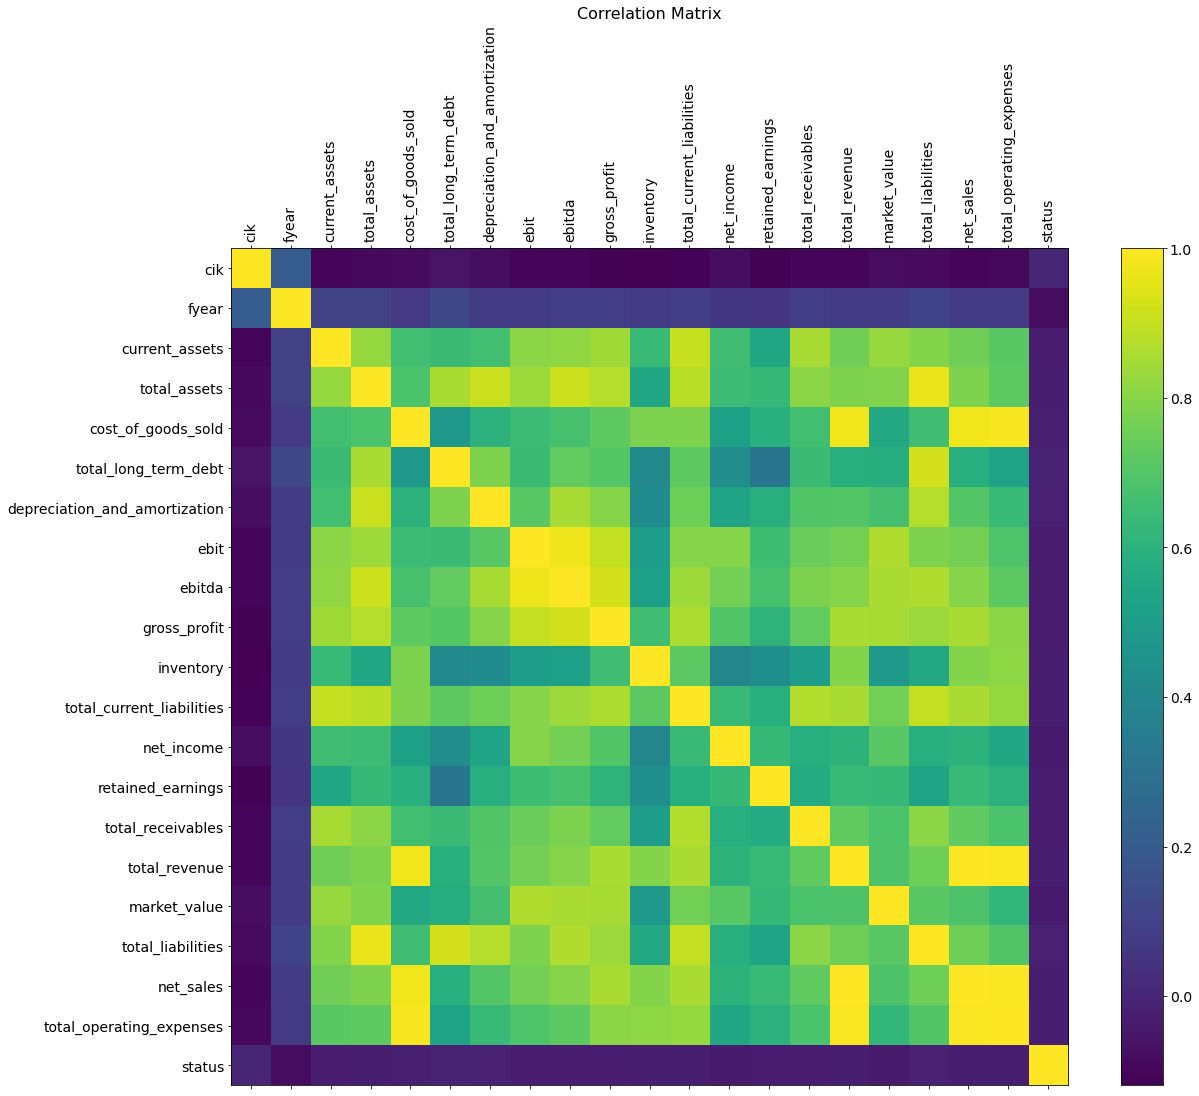

In [77]:
# Correlation Matrix
f = plt.figure(figsize=(19, 15))
plt.matshow(bank_data.corr(), fignum=f.number)

# only select numerical values
plt.xticks(range(bank_data.select_dtypes(['number']).shape[1]), bank_data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(bank_data.select_dtypes(['number']).shape[1]), bank_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [80]:
# FIXME: Creare threshold (?) for predictions to make the only possible values 0 or 1
# Probably a better way to do this
predictions

array([[8.6469330e-02],
       [2.0823285e-02],
       [1.0690618e-01],
       ...,
       [4.1364558e-02],
       [6.7988197e-28],
       [4.0337545e-18]], dtype=float32)

In [79]:
# Confusion Matrix
# FIXME: Not workign yet due to predictions not beign 0 or 1

import seaborn as sns 
# Model improvement and Evaluation 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(metrics.confusion_matrix(y_test, predictions))
print(cm)


ValueError: Classification metrics can't handle a mix of binary and continuous targets